In [2]:
# always execute this cell first
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import datetime

pd.set_option('display.max_colwidth',None) # display max columns of CSV
pd.set_option('display.max_rows',None) # display maximum  rows of CSV
twitter_df = pd.read_csv('data/twitter_data.csv')
reddit_df = pd.read_csv('data/reddit_data.csv')

#### Functions


In [3]:

def add_readable_datetime(dataFrame):
    dataFrame['datetime']=pd.to_datetime(dataFrame['posted_time'].astype(np.int64),unit='s')
    return dataFrame

def print_sentiment_anayled_piechart_of_coin(start_dateObj,end_dateObj,dataFrame,coinName):
    dataFrame=add_readable_datetime(dataFrame)
    current_date=start_dateObj
    while current_date<=end_dateObj:
        filtered_df=dataFrame[(dataFrame['coin_name']==coinName) & (dataFrame['datetime'].dt.date==current_date)]
        if not filtered_df.empty:
            ones = filtered_df['label'].value_counts().get(1, 0)
            zeros = filtered_df['label'].value_counts().get(0, 0)
            neg_ones = filtered_df['label'].value_counts().get(-1, 0)

            ones = 0 if pd.isna(ones) else ones
            zeros = 0 if pd.isna(zeros) else zeros
            neg_ones = 0 if pd.isna(neg_ones) else neg_ones
            
            slices=[ones,zeros,neg_ones]
            labelNames=['positives','neutral','negatives']

            plt.pie(slices,labels=labelNames,wedgeprops={'edgecolor':'black'},autopct='%1.0f%%')
            plt.title(f"{current_date} chart")

            plt.show()
            print(f"postives={ones}, neutral={zeros}, negatives={neg_ones}")
            display(filtered_df.sort_values('datetime',ascending=False) )
        else:
            print('\nthe dataframe is empty in this day:',current_date)

        current_date += datetime.timedelta(days=1) # increment day by day


def print_all_sorted_posts(dataFrame):
    dataFrame=dataFrame.sort_values(by='posted_time',ascending=False)
    dataFrame=add_readable_datetime(dataFrame)
    return dataFrame


def print_info_of_coin(dataFrame,coinName):
    dataFrame=dataFrame.sort_values(by='posted_time',ascending=False)
    dataFrame=add_readable_datetime(dataFrame)
    filt = (dataFrame['coin_name'] == coinName)
    return dataFrame[filt]


def print_posts_of_given_date(dataFrame,givenDate,coinName):
    dataFrame=add_readable_datetime(dataFrame)
    filtered_df=twitter_df[(dataFrame['coin_name']==coinName) & (dataFrame['datetime'].dt.date==givenDate)]
    return filtered_df


def print_sorted_reddit_posts_acording_to_column(start_dateObj,end_dateObj,columnNumber):
    columnName=""
    if columnNumber == 1:
        columnName="upvote_ratio"
    elif columnNumber == 2:
        columnName="post_score"
    elif columnNumber == 3:
        columnName="num_comments"

    dataFrame=add_readable_datetime(pd.read_csv('data/reddit_data.csv'))
    result_df =pd.DataFrame()  # Initialize an empty DataFrame to store the result
    current_date=end_dateObj
    while current_date>=start_dateObj:
        filtered_df=dataFrame[ (dataFrame['datetime'].dt.date==current_date)]
        filtered_df=filtered_df.sort_values([columnName,'datetime'],ascending=[False,False])  
        if not filtered_df.empty:
            display(filtered_df.head(40))
        
        else:
            print('\nthe dataframe is empty in this day:',current_date)

        current_date -= datetime.timedelta(days=1) # increment day by day


def print_sorted_twitter_posts_acording_to_column(start_dateObj,end_dateObj,columnNumber):
    columnName=""
    if columnNumber == 1:
        columnName="likes"
    elif columnNumber == 2:
        columnName="replies"
    elif columnNumber == 3:
        columnName="views"
    elif columnNumber == 4:
        columnName="retweets"    

    dataFrame=add_readable_datetime(pd.read_csv('data/twitter_data.csv'))
    result_df =pd.DataFrame()  # Initialize an empty DataFrame to store the result
    current_date=end_dateObj
    while current_date>=start_dateObj:
        filtered_df=dataFrame[ (dataFrame['datetime'].dt.date==current_date)]
        filtered_df=filtered_df.sort_values([columnName,'datetime'],ascending=[False,False])  
        if not filtered_df.empty:
            display(filtered_df.head(40))
        
        else:
            print('\nthe dataframe is empty in this day:',current_date)

        current_date -= datetime.timedelta(days=1) # increment day by day




# def print_sorted_reddit_posts_acording_to_column_2(start_dateObj,end_dateObj,columnNumber):
#     #find column
#     columnName=1
#     if columnNumber == 1:
#         columnName="upvote_ratio"
#     elif columnNumber == 2:
#         columnName="post_score"
#     elif columnNumber == 3:
#         columnName="num_comments"
 
#     dataFrame=add_readable_datetime(reddit_df)
#     mask=(dataFrame['datetime']>=start_dateObj) & (dataFrame['datetime']<=end_dateObj)
#     dataFrame=dataFrame.loc[mask]
    
#     filtered_df=dataFrame.sort_values([columnName,'datetime'],ascending=[False,False])  
#     return filtered_df.head(100)



#### Coin Names
```
BTC
ETH *+
ETC
Avalanche(AVAX)
Solana(SOL) *+
Monero(XMR) *+
Optimism(OP)
PAX Gold(PAXG) 
Ripple(XRP) *+
Arbitrum(ARB)
Binance(BNB) *-
Cardano(ADA)
Cosmos(ATOM)
Litecoin(LTC) *+
Chainlink(LINK) *+
Aave(AAVE)
Polygon(MATIC)
```

#### Get Sorted all  data

- #####  Reddit

In [ ]:
# upvote_ratio=1,post_score=2,num_comments=3
print_sorted_reddit_posts_acording_to_column(start_dateObj=datetime.date(2023,10,24),end_dateObj=datetime.date(2023,10,25),columnNumber=3)

In [ ]:
print_info_of_coin(dataFrame=reddit_df,coinName='ETH')

- #####  Twitter


In [ ]:
# likes=1,replies=2,views=3,retweets=4
print_sorted_twitter_posts_acording_to_column(start_dateObj=datetime.date(2023,10,24),end_dateObj=datetime.date(2023,10,25),columnNumber=2)

In [ ]:
print_info_of_coin(dataFrame=twitter_df,coinName='ETH')

#### Coin Names
```
BTC
ETH *+
ETC
Avalanche(AVAX)
Solana(SOL) *+
Monero(XMR) *+
Optimism(OP)
PAX Gold(PAXG) 
Ripple(XRP) *+
Arbitrum(ARB)
Binance(BNB) *-
Cardano(ADA)
Cosmos(ATOM)
Litecoin(LTC) *+
Chainlink(LINK) *+
Aave(AAVE)
Polygon(MATIC)
```

#### Sentiment Analysis chart 

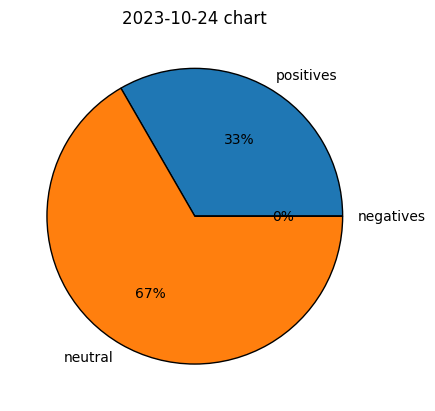

postives=1, neutral=2, negatives=0


,post_text,posted_time,upvote_ratio,post_score,num_comments,coin_name,label,datetime
1921,Vodafone DAB and Chainlink Labs Demonstrate the Transformation of Global Trade through Blockchain Innovation,1.698165e+09,0.64,10,7,Chainlink(LINK),1,2023-10-24 16:37:08
1385,"Chainlink Soars to a 17-Month High, With over $100M LINK Exiting Exchanges",1.698106e+09,0.90,7,4,Chainlink(LINK),0,2023-10-24 00:04:10
1491,"Chainlink Soars to a 17-Month High, With over $100M LINK Exiting Exchanges",1.698106e+09,1.00,1,0,Chainlink(LINK),0,2023-10-24 00:04:09



the dataframe is empty in this day: 2023-10-25


In [4]:

print_sentiment_anayled_piechart_of_coin(start_dateObj=datetime.date(2023,10,24),end_dateObj=datetime.date(2023,10,25),dataFrame=pd.read_csv('data/reddit_data.csv'),coinName='Chainlink(LINK)')


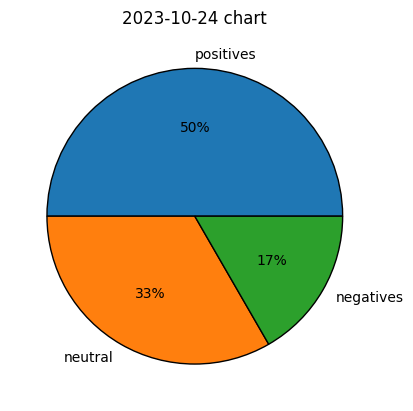

postives=3, neutral=2, negatives=1


,tweet,retweets,likes,replies,views,posted_time,coin_name,label,datetime
1002,"On 10/25 at 6PM ET, @ChainlinkLabs CCIP Market Strategy Manager @pieterpauwels will be live on Spaces with @77MichaelR to give the community an overview of Chainlink #CCIP's Risk Management Network.Set a reminder for the Space",53.0,347.0,15.0,21300,1698181620,Chainlink(LINK),-1,2023-10-24 21:07:00
1000,"Episode 79 of the Public Key podcast is all about web3 adoption in traditional finance, with guest @kelmoujahid, Chief Product Officer at @chainlink. https://chainalysis.com/blog/web3-adoption-in-traditional-finance-kemal-el-moujahid-ep-79/…",30.0,135.0,10.0,26300,1698166801,Chainlink(LINK),0,2023-10-24 17:00:01
1005,.@VodafoneBiz is collaborating with @ChainlinkLabs on a CCIP-powered global trade use case and has joined the #Chainlink Network as a node operator. CCIP is not just for finance—see how it can connect global trade platforms across any blockchain https://vodafone.com/news/technology/vodafone-dab-chainlink-lab-demonstrates-transformation-global-trade-blockchain-innovation…,329.0,1292.0,38.0,64300,1698164337,Chainlink(LINK),0,2023-10-24 16:18:57
1010,⬡ Introducing Constellation: a Chainlink Hackathon ⬡- Compete for $350K+ in prizes. - Attend expert-run workshops- Get real-time support Take your developer journey to the next level,886.0,6701.0,693.0,8900000,1698160127,Chainlink(LINK),1,2023-10-24 15:08:47
1004,"Vodafone’s Digital Asset Broker has demonstrated a proof of concept with Sumitomo Corporation, @Chainlink Labs & @InnoWave to address challenges in the global trade ecosystem.Discover how DAB-enabled #IoT devices and blockchains can provide secure data for smart contracts.",220.0,665.0,14.0,62200,1698159626,Chainlink(LINK),1,2023-10-24 15:00:26
1006,"#Chainlink's economic system continues to rapidly evolve across its three key pillars:• Increased monetization: From the introduction of new payment models to day-one monetization of new services, users are paying for greater oracle security. • Reduced operating costs:…",377.0,1756.0,52.0,165100,1698149231,Chainlink(LINK),1,2023-10-24 12:07:11



the dataframe is empty in this day: 2023-10-25


In [5]:
print_sentiment_anayled_piechart_of_coin(start_dateObj=datetime.date(2023,10,24),end_dateObj=datetime.date(2023,10,25),dataFrame=pd.read_csv('data/twitter_data.csv'),coinName='Chainlink(LINK)')
